# Mini Projeto de Sistemas Inteligentes
## Multilayer Perceptron - Resolvendo o problema da Lombalgia
### Grupo:
- Felipe Nunes de Almeida Pereira - fnap@cin.ufpe.br
- Gabriel de Melo Evangelista - gme@cin.ufpe.br
- João Pedro Souza Pereira de Moura - jpspm@cin.ufpe.br
- Maria Luísa Leandro de Lima - mlll@cin.ufpe.br
- Washington Igor dos Santos Silva - wiss@cin.ufpe.br

https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

## Imports


In [ ]:
import numpy as np
import pandas as pd
import imblearn

from tensorflow import keras
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Leitura dos dados

In [ ]:
data = pd.read_csv('/content/Dataset_spine.csv')

In [ ]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


## Tratamento dos dados

O tratamento dos dados é iniciado pela remoção da coluna 'Unnamed: 13' que apenas descreve as outras colunas.

In [ ]:
data.drop('Unnamed: 13', axis=1, inplace=True)

In [ ]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [ ]:
data.Class_att.value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

Converte-se os nomes das classes para os valores 0 e 1.

In [ ]:
data['Class_att'].replace('Abnormal', 0, inplace=True)
data['Class_att'].replace('Normal', 1, inplace=True)

In [ ]:
data.Class_att.value_counts()

0    210
1    100
Name: Class_att, dtype: int64

### Normalização

Nessa etapa é feita a normalização dos dados pelo mínimo e máximo de cada coluna. Além disso são separadas as colunas em X e Y.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_X = pd.DataFrame(scaler.fit_transform(data.drop('Class_att', axis = 1)))

In [ ]:
data_X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952,0.471832,0.481023,0.490527,0.500764,0.502473,0.499235
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428,0.287048,0.290724,0.276710,0.295518,0.289298,0.279926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474,0.222123,0.202827,0.275105,0.256427,0.260246,0.272710
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133,0.474855,0.500730,0.480266,0.502859,0.488992,0.480109
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847,0.704722,0.737865,0.720461,0.749831,0.752264,0.722457
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_Y = data['Class_att']

In [ ]:
data_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class_att, dtype: int64

### Separação de dados de treino e teste

Utiliza-se a função `train_test_split` para separar os dados em treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, random_state=1, test_size = 0.2)

### Função de plot de loss e acurácia do treinamento

Cria-se a função auxiliar `historyPlot` que mostra o gráfico da acurária e loss do treinamento e validação, além de mostrar o report de classificação, a matriz de confusão e a acurácia para cada classe do modelo.

In [ ]:
def historyPlot(model, history_dict, x_test, y_test, thresh = 0.5):
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy = history_dict['binary_accuracy']
  val_accuracy = history_dict['val_binary_accuracy']
  
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 2, figsize=(14, 6))

  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  ax[0].set_title('Training & Validation Accuracy', fontsize=16)
  ax[0].set_xlabel('Epochs', fontsize=16)
  ax[0].set_ylabel('Accuracy', fontsize=16)
  ax[0].legend()

  ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
  ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
  ax[1].set_title('Training & Validation Loss', fontsize=16)
  ax[1].set_xlabel('Epochs', fontsize=16)
  ax[1].set_ylabel('Loss', fontsize=16)
  ax[1].legend()
  
  y_pred = model.predict(x_test)
  Y = [1 if pred >= thresh else 0 for pred in y_pred]
  print(classification_report(y_test, Y))
  
  cm = confusion_matrix(y_test, Y, labels = np.unique(y_test))
  cmd = ConfusionMatrixDisplay(cm, display_labels = np.unique(y_test))
  cmd.plot()
  plt.show()

  var = cm.diagonal()/cm.sum(axis=1) 
  print("Accuracy")
  _ = [print( "Label " + str(i) + (": {percentage:.2f} %").format(percentage=100*var[i])) for i in range(len(var))]

## Modelo

Nessa célula são criadas as variáveis que agirão como hiperparâmetros e parâmetros para os modelos a serem testados.

O valor de epochs é alto para permitir que o modelo treine enquanto a condição de earlystopping não for atendida.

O valor de patience de 100 indica que o modelo irá terminar o treinamento após 100 epochs sem melhorias no loss do conjunto de validação.

In [ ]:
## PARÂMETROS FIXOS
epochs = 10000
patience = 100
metric = 'binary_accuracy'
batch = 8
loss = 'binary_crossentropy'
units = 10

## PARÂMETROS VARIÁVEIS NOS EXPERIMENTOS
unitsV = []
do = 0
lr = 0.001
opt = keras.optimizers.Adam
activation='relu'

A função `create_model` cria um modelo a partir dos parâmetros passados.

In [ ]:
def create_model(units, activation, unitsV = [], do = 0):
  model = keras.Sequential()
  model.add(keras.layers.Dense(units, input_shape=(X_train.shape[1],), activation=activation))
  model.add(keras.layers.Dropout(do))
  for unit in unitsV:
    model.add(keras.layers.Dense(unit, activation=activation))
    model.add(keras.layers.Dropout(do))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  return model

A função de `train_model` treina o modelo com os parâmetros passados, além de retornar o histórico de treinamento.

In [ ]:
def train_model(model, opt, lr, X_train, y_train):
  model.compile(optimizer=opt(lr), metrics=metric, loss=loss)
  model.summary()
  history = model.fit(X_train, y_train, verbose=0, epochs=epochs, batch_size=batch, validation_split=0.2, callbacks=[EarlyStopping(patience=patience)])
  return history

## Experimentação

Para este projeto, os parâmetros abaixo serão variados com o intuito de observar como suas mudanças impactam na performance do modelo.

- Tamanho da rede: [1 - 4]
- Taxa de aprendizagem: [0.0005 - 0.01]
- Função de ativação: [relu, softmax, tanh, sigmoid]
- Algoritmo de aprendizagem: [adam, rmsprop, sgd]
- Dropout: [0.1 - 0.7]

Além disso, iremos analisar como o modelo performa caso os dados estivessem balanceados, para isso utilizaremos oversampling na classe minoritária através da função `SMOTE` da biblioteca `imblearn`. 

A função `SMOTE`(Synthetic Minority Oversampling Technique) sintetiza novos exemplos da classe minoritária através da seleção de exemplos que estão próximos no espaço de features, desenhando uma linha entre os exemplos e tomando um novo ponto ao longo dessa linha.

In [ ]:
oversample = imblearn.over_sampling.SMOTE()

In [ ]:
print('Distribuição de classes no treino', y_train.value_counts())

Distribuição de classes no treino 0    168
1     80
Name: Class_att, dtype: int64


In [ ]:
X_train1, y_train1 = oversample.fit_resample(X_train, y_train)

In [ ]:
print('Distribuição de classes no treino', y_train1.value_counts())

Distribuição de classes no treino 1    168
0    168
Name: Class_att, dtype: int64


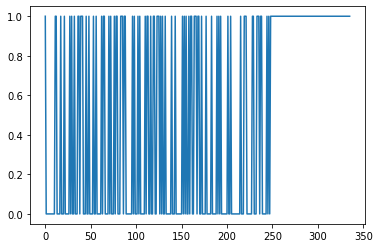

In [ ]:
plt.plot(y_train1)

O oversample foi feito apenas no dataset de treino para que ambos modelos, balanceado e não balanceado, sejam testados no mesmo conjunto de teste.

### Modelo Básico

Um modelo básico é criado para servir de base para os experimentos. Esse modelo consiste de uma camada com 10 unidades, ativação relu e uma camada de saída com 1 unidade e ativação sigmoid.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.74      0.70      0.72        20

    accuracy                           0.82        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.82      0.82      0.82       

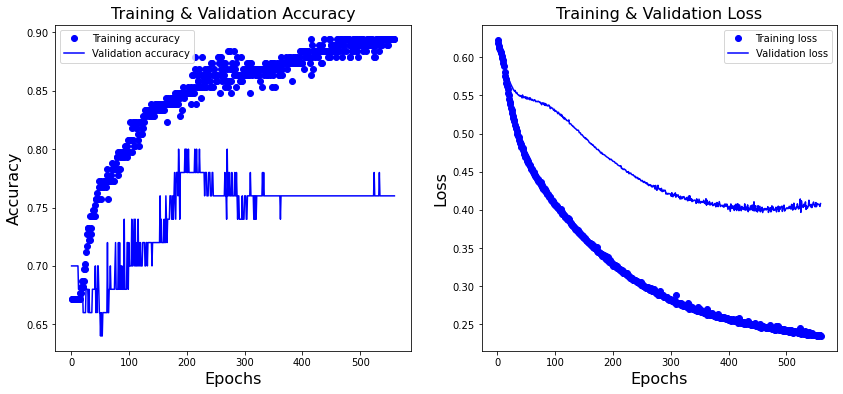

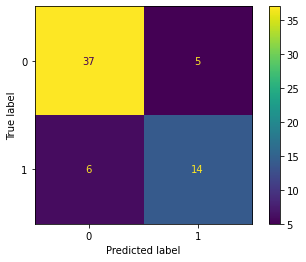

Accuracy
Label 0: 88.10 %
Label 1: 70.00 %


In [ ]:
basicModel = create_model(units, activation)
basicHistory = train_model(basicModel, opt, lr, X_train, y_train)
historyPlot(basicModel, basicHistory.history, X_test, y_test)

Um modelo básico balanceado também é criado com estrutura igual ao do modelo anterior.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84     

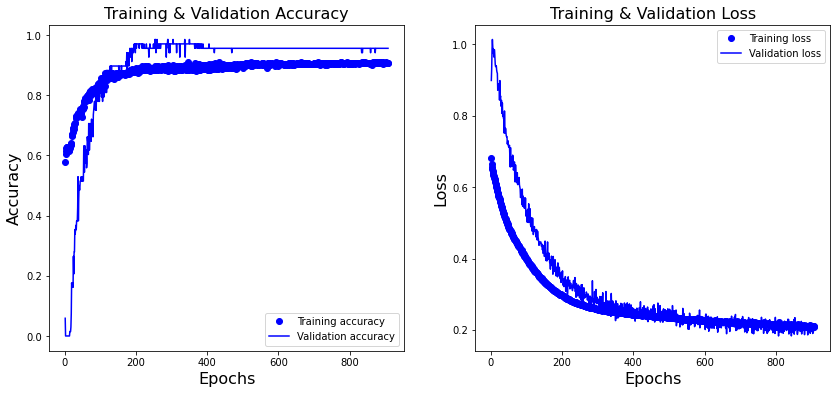

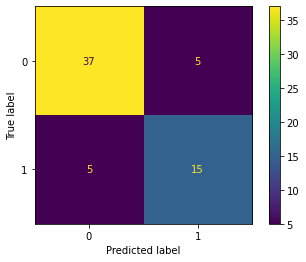

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
basicModelOS = create_model(units, activation)
basicHistoryOS = train_model(basicModelOS, opt, lr, X_train1, y_train1)
historyPlot(basicModelOS, basicHistoryOS.history, X_test, y_test)

Observa-se que inicialmente o modelo balanceado performou melhor com um F1 score macro de 82% enquanto o modelo não balanceado obteve 79%. Observa-se também que o valor de patience mais alto permitiu ao modelo balanceado aprender após as epochs iniciais em que o loss cresceu e a acurácia diminuiu.

### Algoritmo de Aprendizagem
#### Adam, RMSProp, SGD
Gradientes podem explodir ou esvanecer, a depender do learning rate ou do algoritmo de aprendizagem. O "vanishing gradient" é um dos problemas que podem ocorrer na atualização dos valores dos pesos, onde o gradiente tende a zero e a aprendizagem é lenta ou inexistente.

Nesse experimento, iremos variar os algoritmos de otimização da aprendizagem na etapa de backpropagation.

Iremos explorar:
* Adam: A otimização de Adam é um método de gradiente descendente estocástico que é baseado na estimativa adaptativa dos momentos de primeira e segunda ordem.
* RMSProp: A essência do RMSProp é de manter uma média móvel do quadrado dos gradientes e dividir o gradiente pela raiz desta média.
* Gradiente Descendente Estocástico(SGD): O SGD utiliza registros únicos para atualizar os parâmetros, mas ele é lento em convergir pois é necessário fazer a propagação para frente e para trás para cada registro e o caminho para chegar ao mínimo local se torna muito ruidoso



O otimizador atual é Adam
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 0.3413 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.81      0.65      0.72        20

    accuracy                          

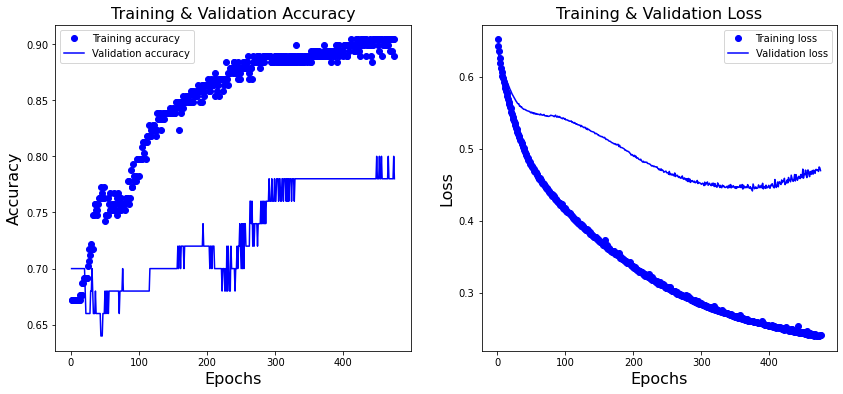

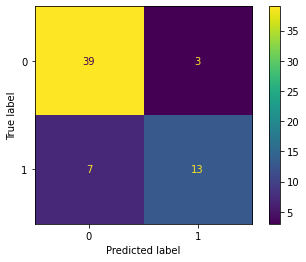

Accuracy
Label 0: 92.86 %
Label 1: 65.00 %
O otimizador atual é RMSprop
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 0.3295 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70      0.74    

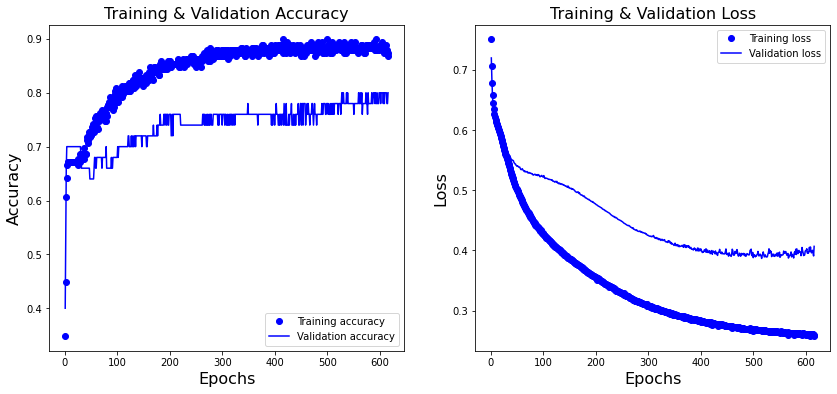

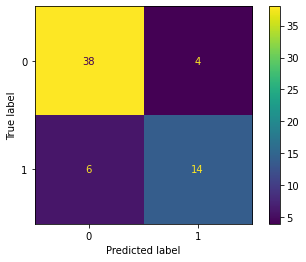

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
O otimizador atual é SGD
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                130       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 0.5480 - binary_accuracy: 0.6935
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        42
           1       0.57      0.20      0.30        

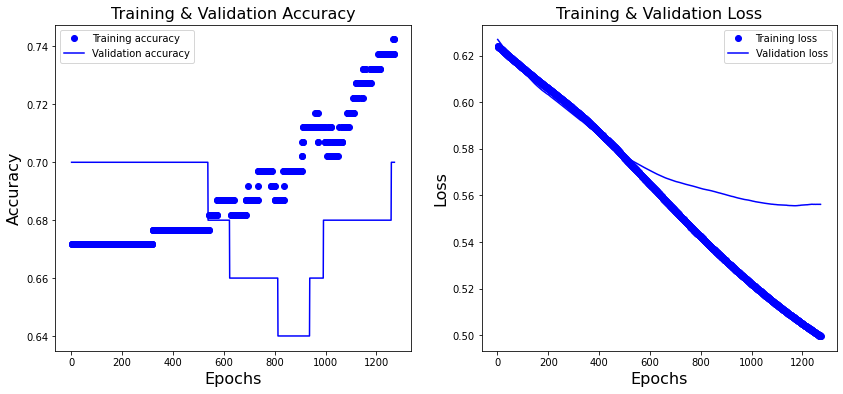

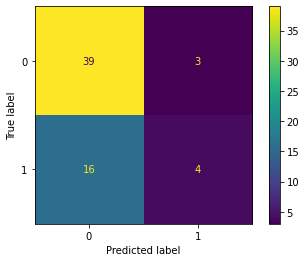

Accuracy
Label 0: 92.86 %
Label 1: 20.00 %


In [ ]:
eval = []
values = [keras.optimizers.Adam, keras.optimizers.RMSprop, keras.optimizers.SGD]
for opti in values:
  model = create_model(units, activation)
  print("O otimizador atual é " + opti.__name__)
  history = train_model(model, opti, lr, X_train, y_train)
  eval.append(model.evaluate(X_test, y_test))
  historyPlot(model, history.history, X_test, y_test)

#### Resultados

In [ ]:
for i in range(len(eval)):
  print(("Algoritmo {op} | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(op=values[i].__name__, percentage2=eval[i][0], percentage1=100*(eval[i][1])))

Algoritmo Adam | Accuracy: 83.87 % | Loss: 0.34
Algoritmo RMSprop | Accuracy: 83.87 % | Loss: 0.33
Algoritmo SGD | Accuracy: 69.35 % | Loss: 0.55



Dos algoritmos de otimização, o RMSprop se saiu melhor com um loss ligeiramente menor que o loss do Adam e um F1 score macro 1% maior que o Adam. Por isso, para os próximos experimentos o RMSprop será utilizado.


In [ ]:
opt = keras.optimizers.RMSprop

#### Modelo Balanceado

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                130       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84     

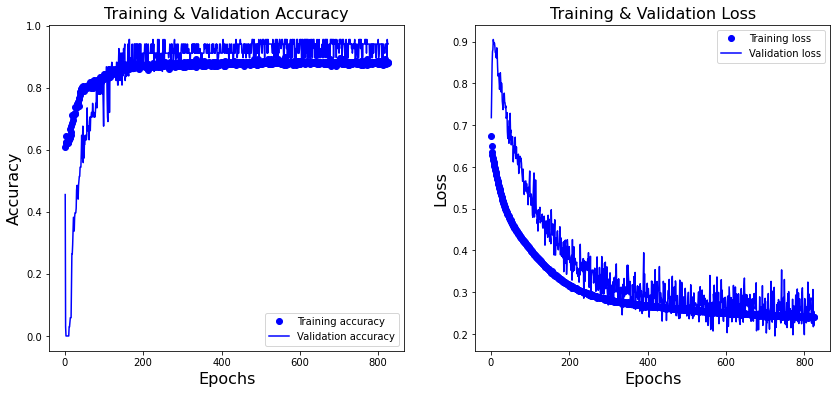

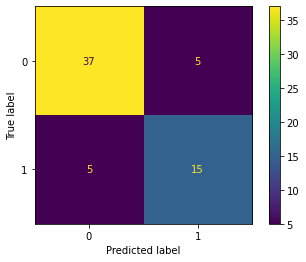

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
modelOS = create_model(units, activation)
HistoryOS = train_model(modelOS, opt, lr, X_train1, y_train1)
historyPlot(modelOS, HistoryOS.history, X_test, y_test)

Observa-se que para o modelo balanceado não houve melhoria em relação ao modelo básico anterior.

### Taxa de aprendizagem
#### Valores a serem testados: $0.0005$ a $0.01$ com passo $0.001$

Analisaremos agora o impacto da taxa de aprendizagem, para isso compilaremos $1$ modelo básico modificando apenas a taxa de aprendizagem de $0.0005$ a $0.01$ com passo $0.001$.

A taxa de aprendizagem atual é 0.0005
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                130       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 0.3328 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy              

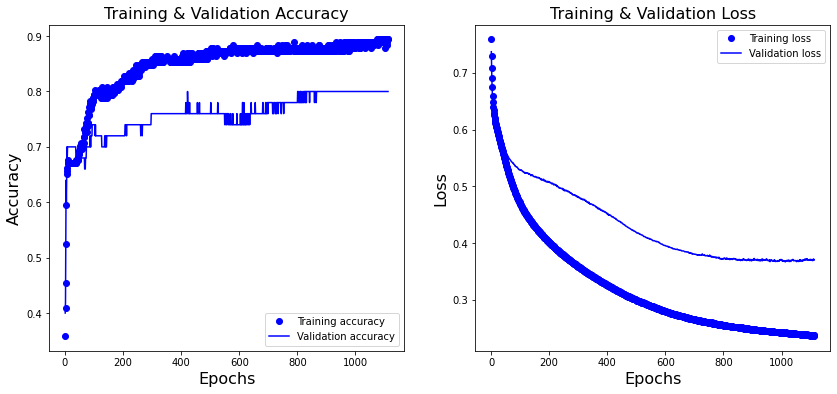

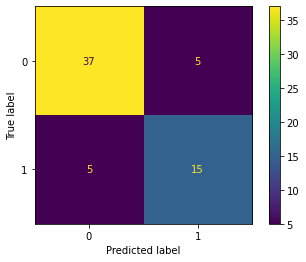

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %
A taxa de aprendizagem atual é 0.001
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                130       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 0.3389 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.74      0.70      

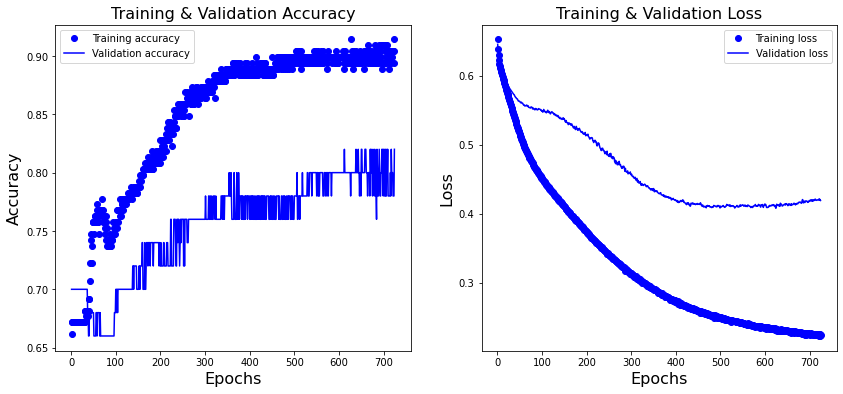

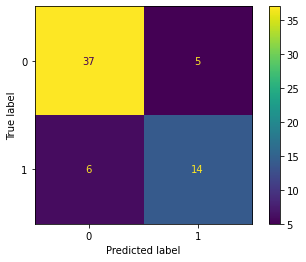

Accuracy
Label 0: 88.10 %
Label 1: 70.00 %
A taxa de aprendizagem atual é 0.002
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                130       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.3768 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.74      0.70      

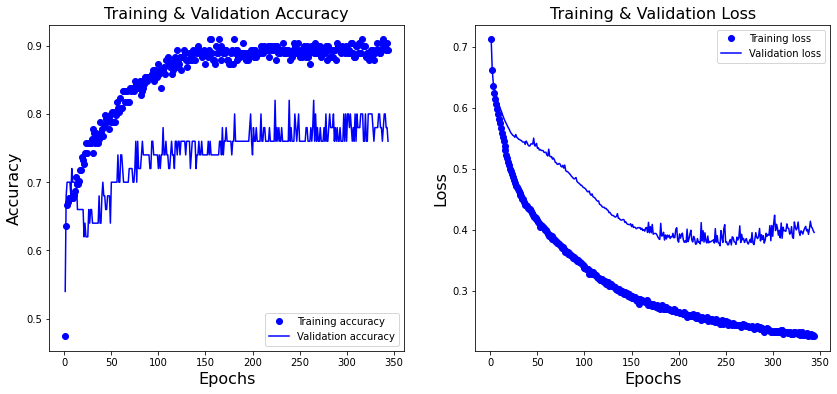

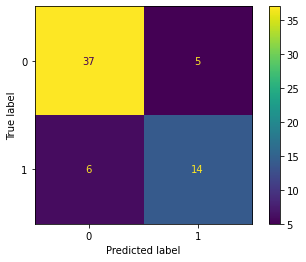

Accuracy
Label 0: 88.10 %
Label 1: 70.00 %
A taxa de aprendizagem atual é 0.003
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                130       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 0.3395 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.79      0.75      

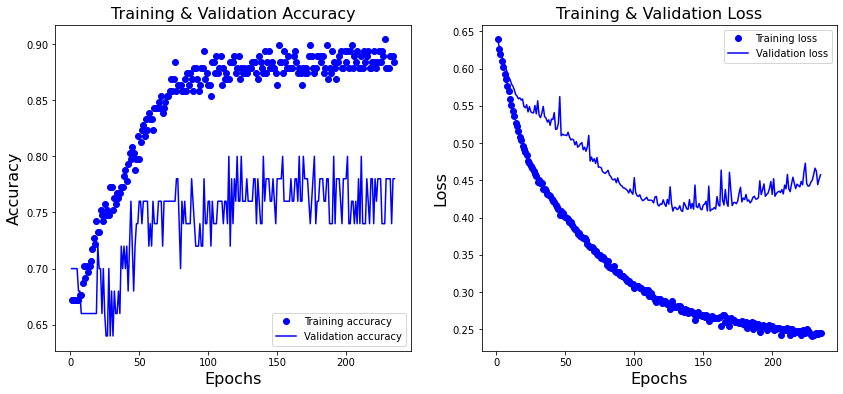

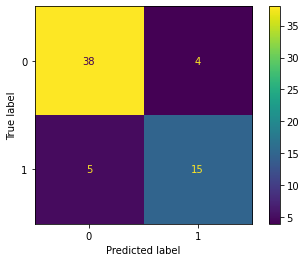

Accuracy
Label 0: 90.48 %
Label 1: 75.00 %
A taxa de aprendizagem atual é 0.004
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                130       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.4604 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.71      0.75     

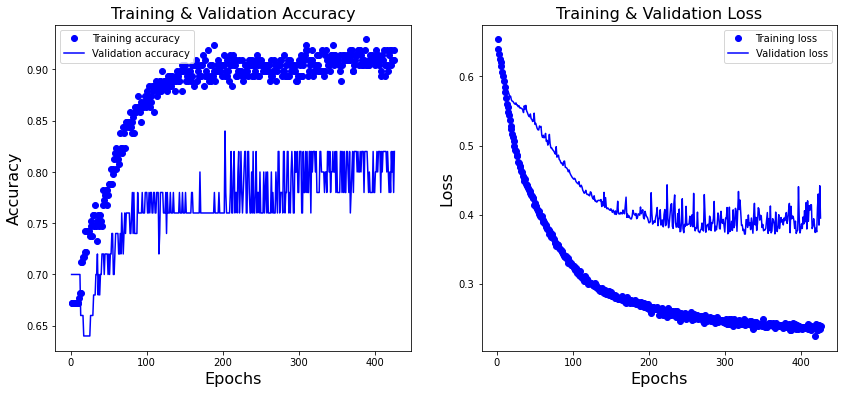

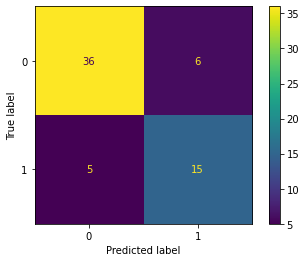

Accuracy
Label 0: 85.71 %
Label 1: 75.00 %
A taxa de aprendizagem atual é 0.005
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                130       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 0.4175 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70     

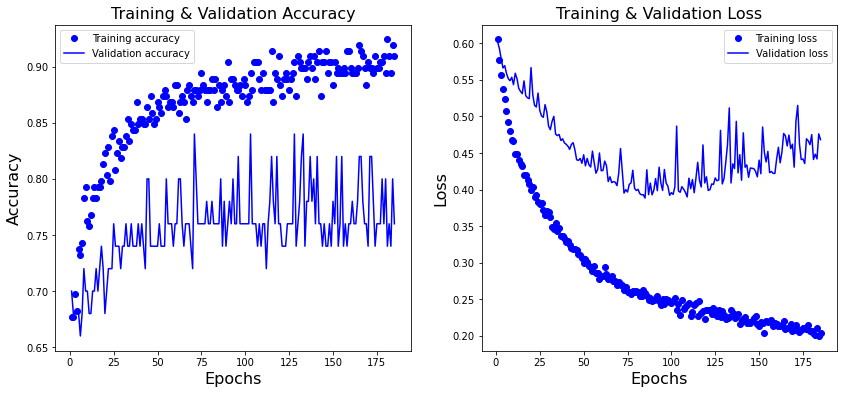

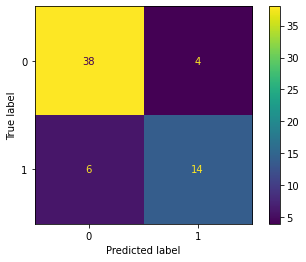

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
A taxa de aprendizagem atual é 0.006
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                130       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 0.4064 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70     

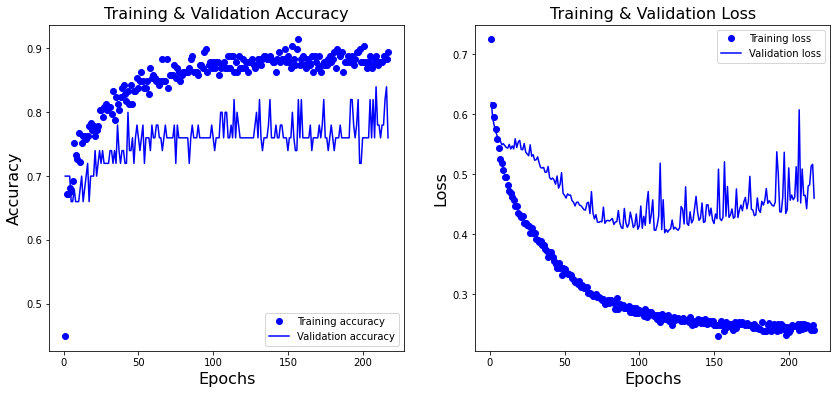

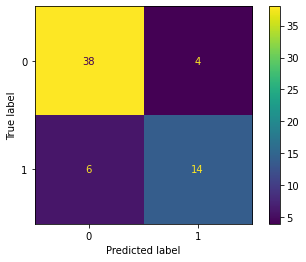

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
A taxa de aprendizagem atual é 0.007
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                130       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 11ms/step - loss: 0.3384 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.71      0.75    

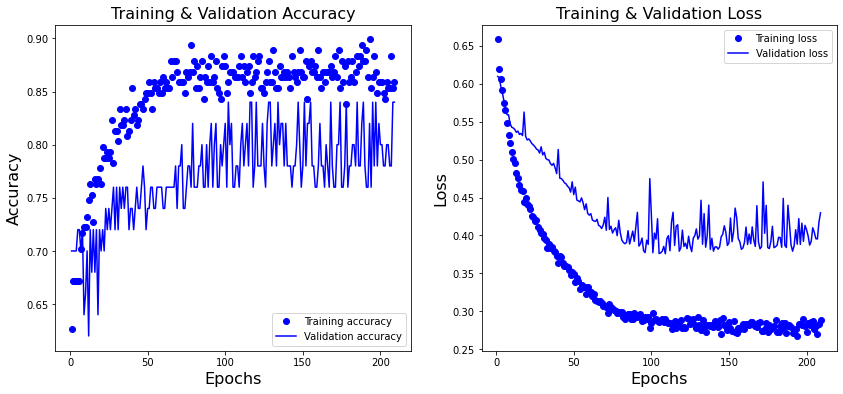

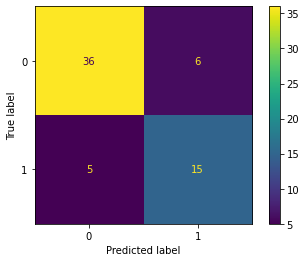

Accuracy
Label 0: 85.71 %
Label 1: 75.00 %
A taxa de aprendizagem atual é 0.008
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                130       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step - loss: 0.3633 - binary_accuracy: 0.8710
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.88      0.70     

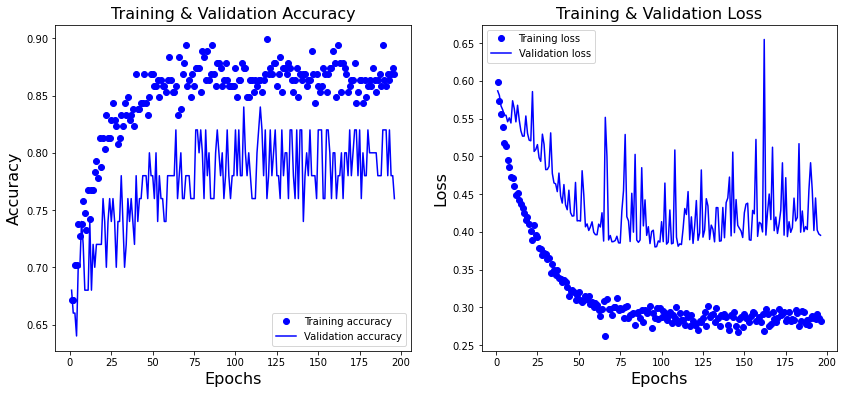

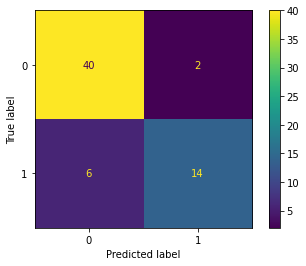

Accuracy
Label 0: 95.24 %
Label 1: 70.00 %
A taxa de aprendizagem atual é 0.009000000000000001
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                130       
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 11ms/step - loss: 0.3482 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.7

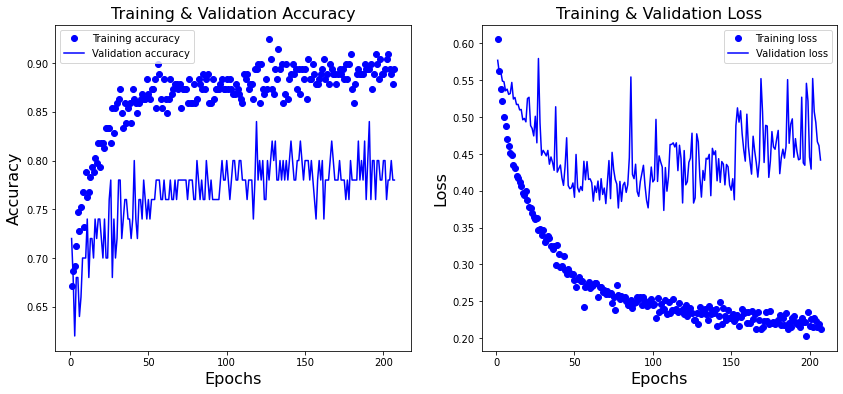

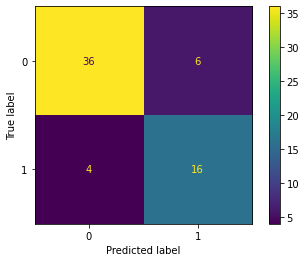

Accuracy
Label 0: 85.71 %
Label 1: 80.00 %
A taxa de aprendizagem atual é 0.010000000000000002
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                130       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 14ms/step - loss: 0.3653 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.7

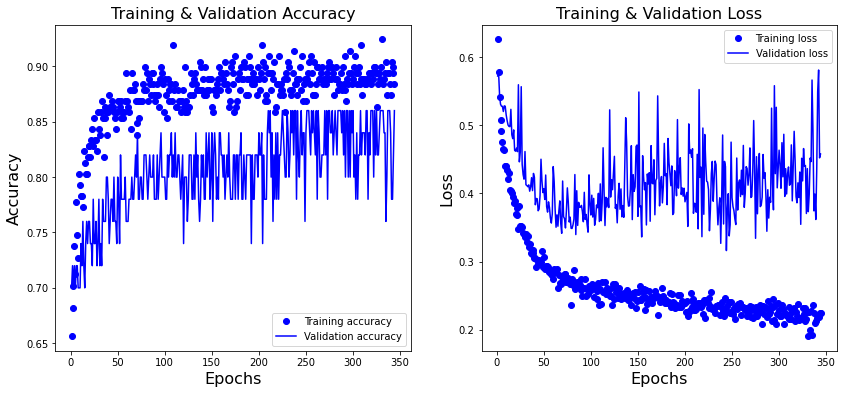

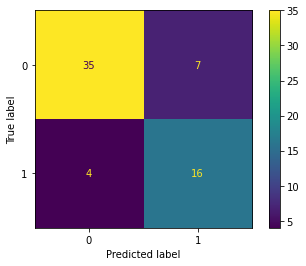

Accuracy
Label 0: 83.33 %
Label 1: 80.00 %


In [ ]:
eval = []
values = np.append([0.0005], np.arange(0.001, 0.011, 0.001))
for i in values:
  model = create_model(units, activation)
  print("A taxa de aprendizagem atual é " + str(i))
  history = train_model(model, opt, i, X_train, y_train)
  eval.append(model.evaluate(X_test, y_test))
  historyPlot(model, history.history, X_test, y_test)

#### Resultados

In [ ]:
for i in range(len(eval)):
  print(("Taxa " + str(values[i]) + " | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(percentage2=eval[i][0], percentage1=100*(eval[i][1])))

Taxa 0.0005 | Accuracy: 83.87 % | Loss: 0.33
Taxa 0.001 | Accuracy: 82.26 % | Loss: 0.34
Taxa 0.002 | Accuracy: 82.26 % | Loss: 0.38
Taxa 0.003 | Accuracy: 85.48 % | Loss: 0.34
Taxa 0.004 | Accuracy: 82.26 % | Loss: 0.46
Taxa 0.005 | Accuracy: 83.87 % | Loss: 0.42
Taxa 0.006 | Accuracy: 83.87 % | Loss: 0.41
Taxa 0.007 | Accuracy: 82.26 % | Loss: 0.34
Taxa 0.008 | Accuracy: 87.10 % | Loss: 0.36
Taxa 0.009000000000000001 | Accuracy: 83.87 % | Loss: 0.35
Taxa 0.010000000000000002 | Accuracy: 82.26 % | Loss: 0.37


Para valores muito grandes do learning rate, pode haver a divergência do gradient descent na etapa do backpropagation. Por outro lado, com um learning rate muito pequeno, a aprendizagem pode ser lenta. Dentre os valores definidos acima, observa-se que 0.0005 apresentou maior acurácia e menor loss como esperado para um treinamento em que utiliza-se o fator de patience.

In [ ]:
lr = 0.0005

#### Modelo Balanceado

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                130       
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70      0.74        20

    accuracy                           0.84        62
   macro avg       0.82      0.80      0.81        62
weighted avg       0.84      0.84      0.84    

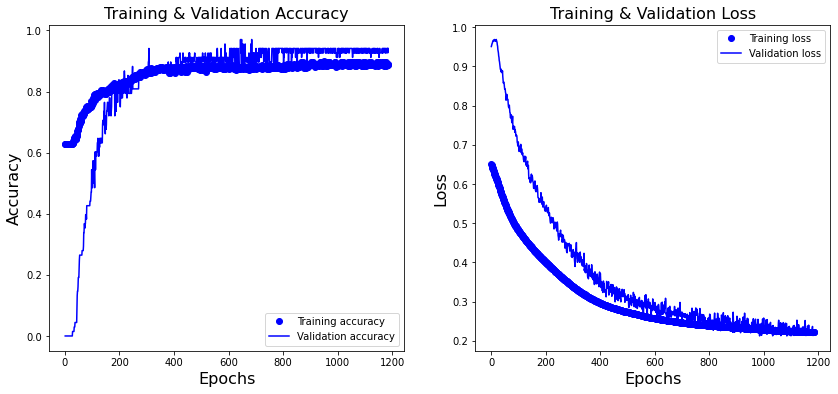

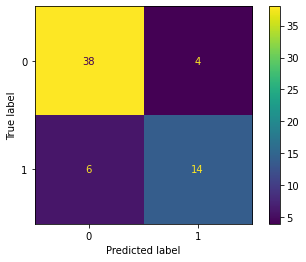

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %


In [ ]:
modelOS = create_model(units, activation)
HistoryOS = train_model(modelOS, opt, lr, X_train1, y_train1)
historyPlot(modelOS, HistoryOS.history, X_test, y_test)

### Tamanho da rede
#### Valores a serem testados: $1, 2, 3$ ou $4$ camadas

Primeiramente iremos analisar a influência do tamanho da rede na acurácia e no loss do modelo. Todos os modelos terão uma camada densa de saída de 10 unidades.

Criamos $5$ modelos:
 

1.   Apenas a camada simples
2.   Camada densa com $10$ unidades
3.   Camada densa com $10$ unidades + camada densa com $10$ unidades
3.   Camada densa com $20$ unidades $+$ camada densa com $10$ unidades
4.   Camada densa com $20$ unidades $+$ camada densa com $10$ unidades $+$ camada densa com $5$ unidades



Para todos os modelos utilizamos o otimizador Adam, a métrica acurácia e a função de perda $binary\_crossentropy$ 

O número atual de camadas é  1
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 10)                130       
                                                                 
 dropout_30 (Dropout)        (None, 10)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 0.3020 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.74      0.70      0.72        20

    accuracy                    

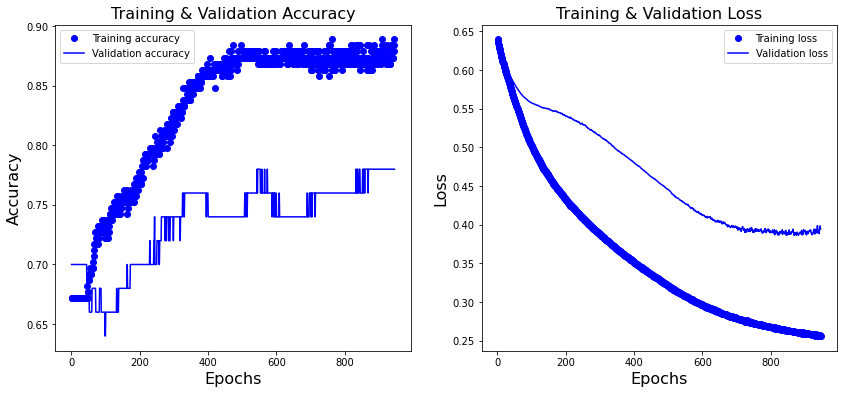

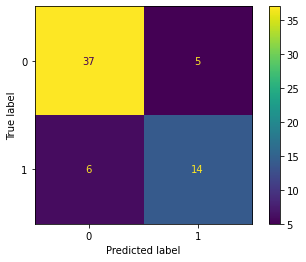

Accuracy
Label 0: 88.10 %
Label 1: 70.00 %
O número atual de camadas é  2
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                130       
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dropout_32 (Dropout)        (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_______________________________________________

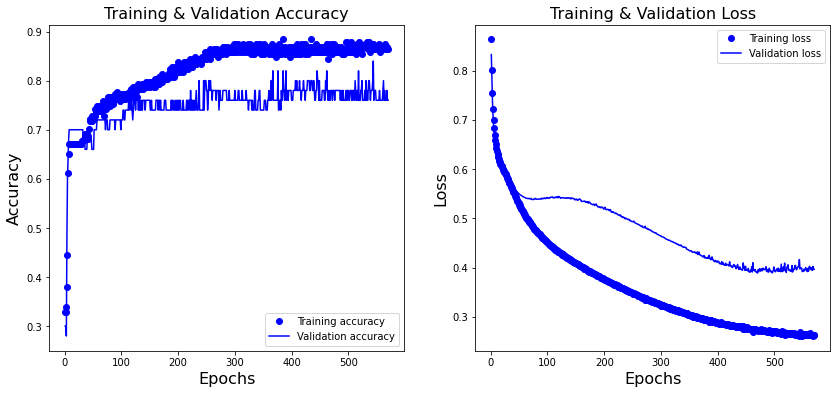

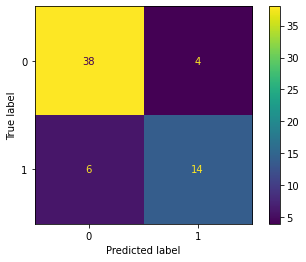

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
O número atual de camadas é  3
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                130       
                                                                 
 dropout_33 (Dropout)        (None, 10)                0         
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dropout_34 (Dropout)        (None, 10)                0         
                                                                 
 dense_59 (Dense)            (None, 10)                110       
                                                                 
 dropout_35 (Dropout)        (None, 10)                0         
                                             

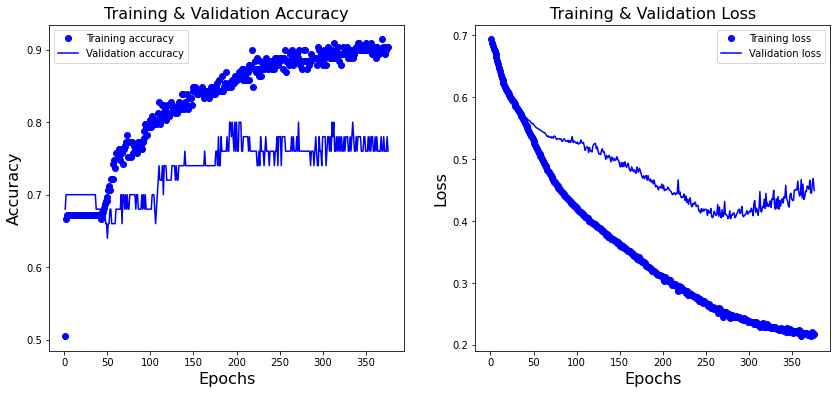

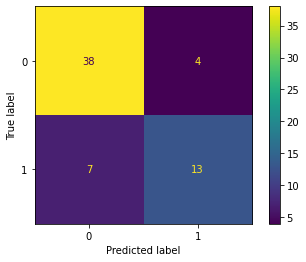

Accuracy
Label 0: 90.48 %
Label 1: 65.00 %
O número atual de camadas é  4
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 10)                130       
                                                                 
 dropout_36 (Dropout)        (None, 10)                0         
                                                                 
 dense_62 (Dense)            (None, 20)                220       
                                                                 
 dropout_37 (Dropout)        (None, 20)                0         
                                                                 
 dense_63 (Dense)            (None, 10)                210       
                                                                 
 dropout_38 (Dropout)        (None, 10)                0         
                                             

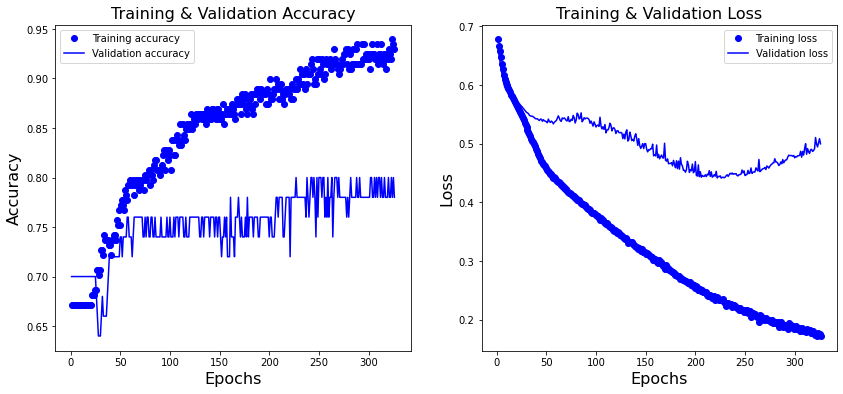

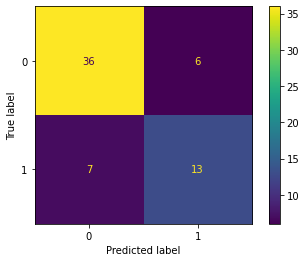

Accuracy
Label 0: 85.71 %
Label 1: 65.00 %
O número atual de camadas é  5
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 10)                130       
                                                                 
 dropout_39 (Dropout)        (None, 10)                0         
                                                                 
 dense_66 (Dense)            (None, 20)                220       
                                                                 
 dropout_40 (Dropout)        (None, 20)                0         
                                                                 
 dense_67 (Dense)            (None, 10)                210       
                                                                 
 dropout_41 (Dropout)        (None, 10)                0         
                                             

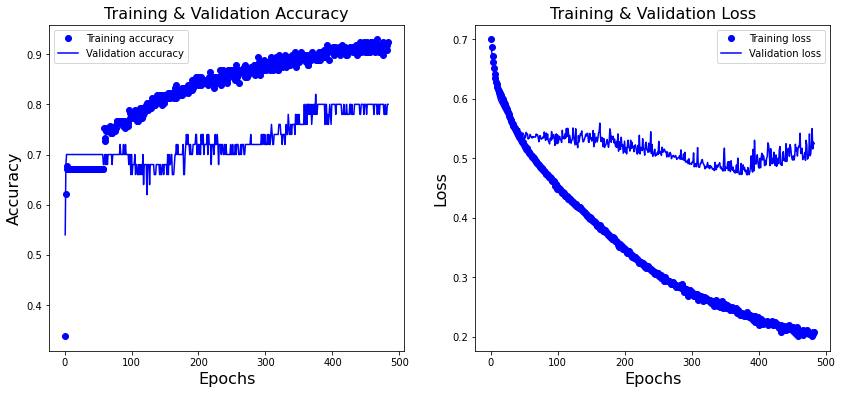

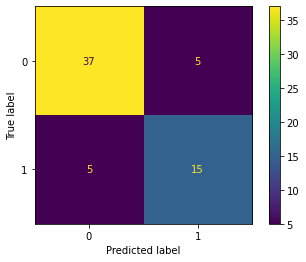

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
values = [[], [10], [10, 10], [20, 10], [20, 10, 5]]
eval = []
for i in range(0, len(values)):
  model = create_model(units, activation, unitsV = values[i])
  print("O número atual de camadas é ", i + 1)
  history = train_model(model, opt, lr, X_train, y_train)
  eval.append(model.evaluate(X_test, y_test))
  historyPlot(model, history.history, X_test, y_test)

#### Resultados

In [ ]:
for i in range(len(eval)):
  print(("Modelo {i} | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(i = i+1, percentage2=eval[i][0], percentage1=100*(eval[i][1])))

Modelo 1 | Accuracy: 82.26 % | Loss: 0.30
Modelo 2 | Accuracy: 83.87 % | Loss: 0.37
Modelo 3 | Accuracy: 82.26 % | Loss: 0.39
Modelo 4 | Accuracy: 79.03 % | Loss: 0.44
Modelo 5 | Accuracy: 83.87 % | Loss: 0.52


A análise dos resultados deste experimento mostra que o aumento do números de camadas levou a um aumento no loss e a uma mudança não significativa na acurácia. Por conta disso, o modelo com apenas 1 camada intermediária será mantido.

In [ ]:
unitsV = []

#### Modelo Balanceado

Como não houve mudança na arquitetura do modelo, a célula abaixo não será executada.

In [ ]:
modelOS = create_model(units, activation, unitsV = unitsV)
HistoryOS = train_model(modelOS, opt, lr, X_train1, y_train1)
historyPlot(modelOS, HistoryOS.history, X_test, y_test)

### Função de ativação
#### Relu, Softmax, Tanh, sigmoid

A função de ativação de um nó determina como a soma ponderada da entrada é transformada na saída de um nó da rede. As seguintes funções serão experimentadas:



1.   ReLU: Caso o valor seja negativo, retorna $0$, caso contrário, o $x$ é retornado. 
<br>
<img src=https://www.researchgate.net/profile/Muhammad-Farrukh-5/publication/338580890/figure/fig4/AS:847253531009024@1579012391114/Graph-for-Relu-Function.ppm/>

2.   Softmax: Retorna uma lista de probabilidades para cada classe em que todos os valores somam 1. Isso é obtido pelo cálculo do exponencial de cada valor na lista e dividindo pela soma do exponencial dos valores.
<br>
<img src=https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png/ alt = "drawing" height="290" width="370"/>

3.   Tanh: Pega qualquer valor real como entrada e retorna um valor no intervalo $[-1, 1]$. Maior a entrada, mais próximo será de 1 e menor a entrada, mais próximo será de -1.
<br>
<img src=https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png alt = "drawing" height="290" width="370"/>

4.   Sigmoid: Também chamada de função logística, ela pega um valor real como entrada e retorna valores de saída no intervalo $[0, 1]$. Maior a entrada, mais próximo de 1 e menor a entrada, mais próximo será de 0.
<br>
<img src=https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png alt = "drawing" height="290" widht="370"/>


A função de ativação atual é relu
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 10)                130       
                                                                 
 dropout_43 (Dropout)        (None, 10)                0         
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 0.3219 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.74      0.70      0.72        20

    accuracy                 

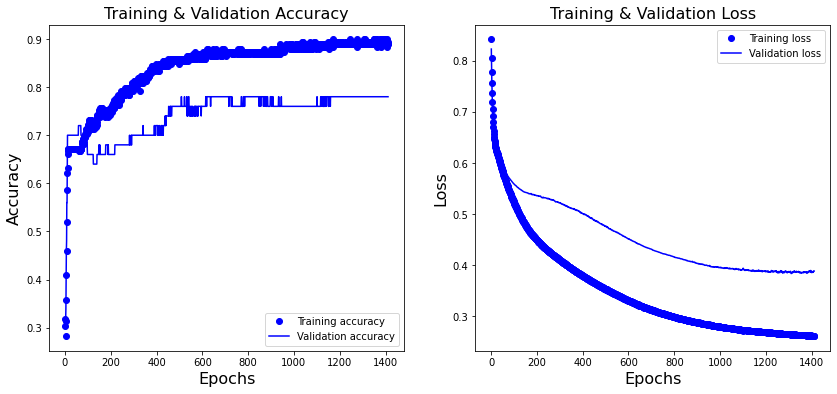

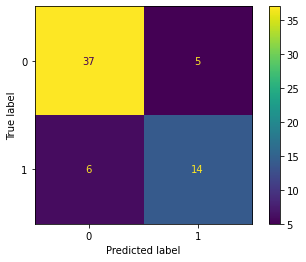

Accuracy
Label 0: 88.10 %
Label 1: 70.00 %
A função de ativação atual é softmax
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                130       
                                                                 
 dropout_44 (Dropout)        (None, 10)                0         
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 10ms/step - loss: 0.3221 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70    

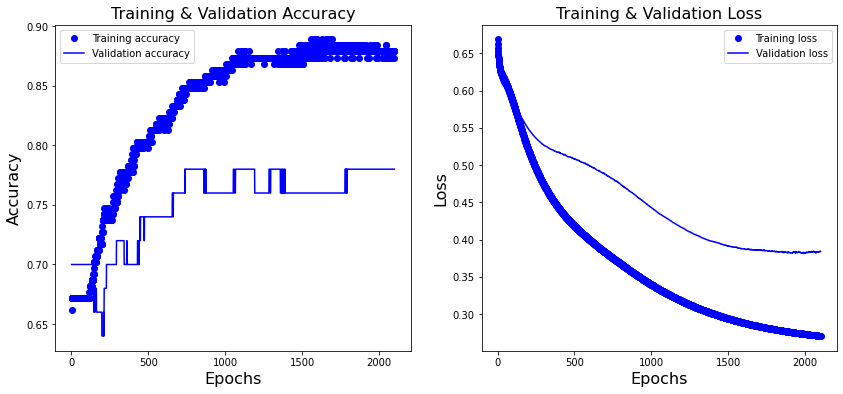

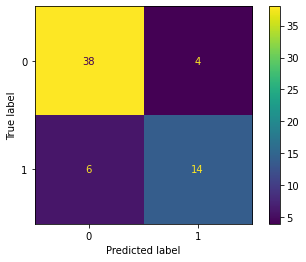

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
A função de ativação atual é tanh
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 10)                130       
                                                                 
 dropout_45 (Dropout)        (None, 10)                0         
                                                                 
 dense_75 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 0.3278 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.82      0.70      0.

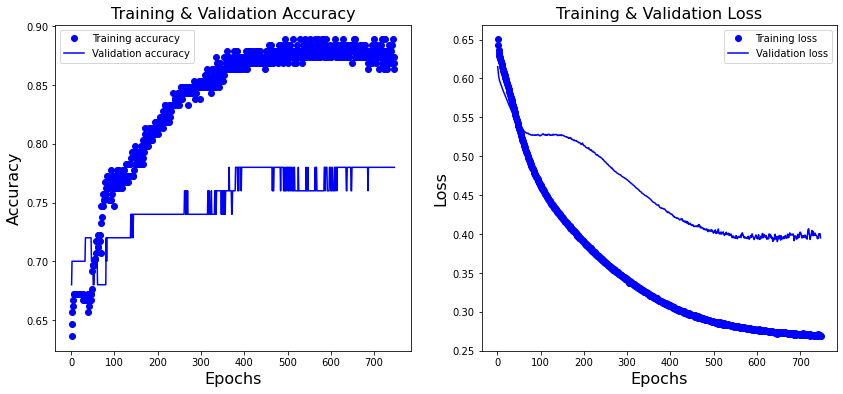

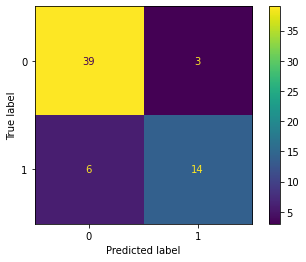

Accuracy
Label 0: 92.86 %
Label 1: 70.00 %
A função de ativação atual é sigmoid
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 10)                130       
                                                                 
 dropout_46 (Dropout)        (None, 10)                0         
                                                                 
 dense_77 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 13ms/step - loss: 0.3277 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70    

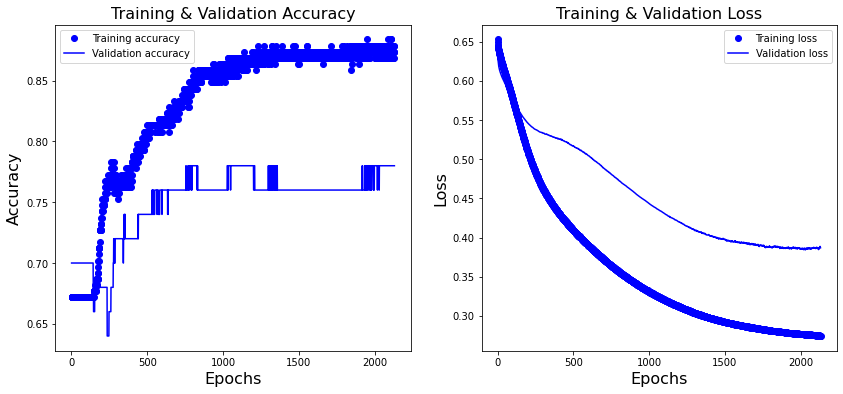

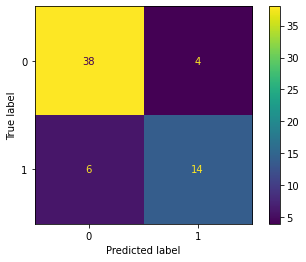

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %


In [ ]:
eval = []
values = ['relu', 'softmax', 'tanh', 'sigmoid']
for ac in values:
  model = create_model(units, ac, unitsV = unitsV)
  print("A função de ativação atual é " + ac)
  history = train_model(model, opt, lr, X_train, y_train)
  eval.append(model.evaluate(X_test, y_test))
  historyPlot(model, history.history, X_test, y_test)

#### Resultados

In [ ]:
for i in range(len(eval)):
  print(("Função de Ativação " + str(values[i]) + " | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(percentage2=eval[i][0], percentage1=100*(eval[i][1])))

Função de Ativação relu | Accuracy: 82.26 % | Loss: 0.32
Função de Ativação softmax | Accuracy: 83.87 % | Loss: 0.32
Função de Ativação tanh | Accuracy: 85.48 % | Loss: 0.33
Função de Ativação sigmoid | Accuracy: 83.87 % | Loss: 0.33


Com base nos resultados dos testes, temos que as performances das funções foram próximas mas que o tanh se destacou com maior acurácia.

A escolha da função de ativação é importante para evitar problemas durante o treinamento, como o problema de "vanishing gradient", quando a derivada de uma função em um certo ponto é tão pequena que não há mudança significativa dos pesos no backpropagation. 

Apesar de funções lineares serem utilizadas para evitar tal problema, a função tanh será utilizada pois teve melhor perfomance.


In [ ]:
activation = 'tanh'

#### Modelo Balanceado

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 10)                130       
                                                                 
 dropout_64 (Dropout)        (None, 10)                0         
                                                                 
 dense_113 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84    

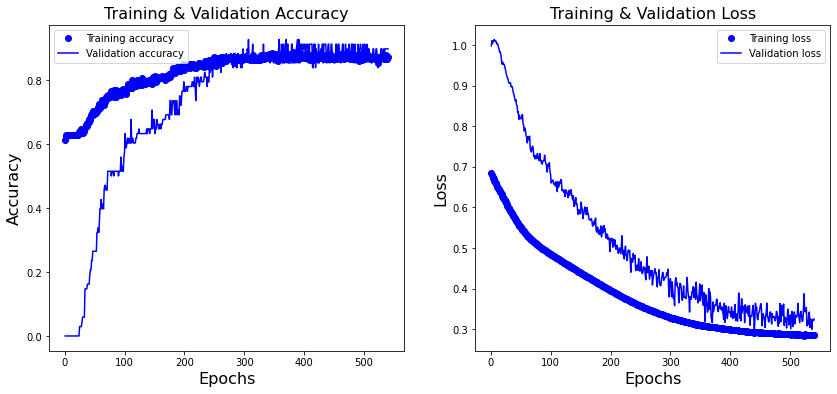

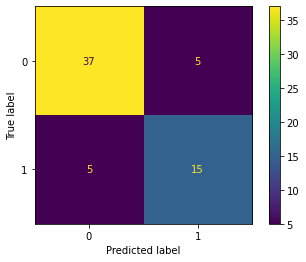

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
modelOS = create_model(units, activation)
HistoryOS = train_model(modelOS, opt, lr, X_train1, y_train1)
historyPlot(modelOS, HistoryOS.history, X_test, y_test)

### Dropout
#### $0.1, 0.2, 0.3, 0.4, 0.5, 0.6$ ou $0.7$

A técnica de dropout consiste no descarte de nós aleatórios entre camadas do modelo. Essa técnica é utilizada para evitar o overfitting dos dados, quando o modelo não é preciso com dados não vistos. Optamos por testar a acurácia e loss para valores entre $[0.1, 0.7]$ com passo $0.1$.

O dropout atual é: 0.0
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                130       
                                                                 
 dropout_56 (Dropout)        (None, 10)                0         
                                                                 
 dense_97 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 9ms/step - loss: 0.3165 - binary_accuracy: 0.8226
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.71      0.75      0.73        20

    accuracy                           0

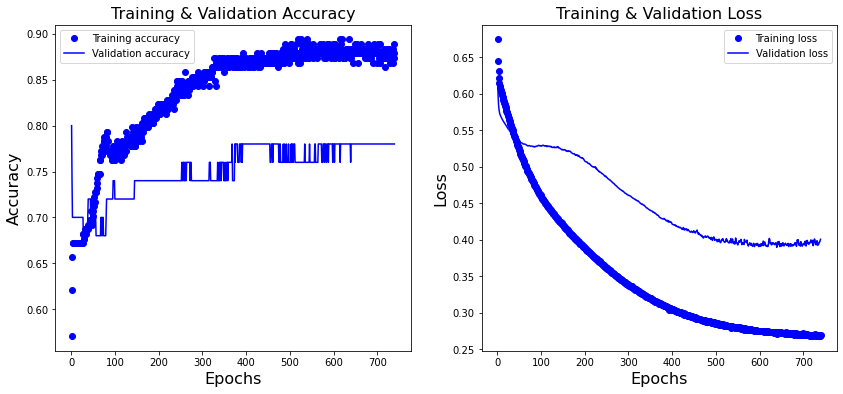

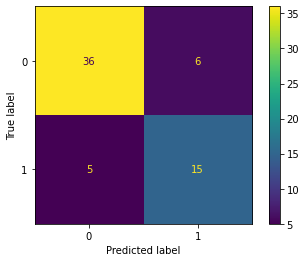

Accuracy
Label 0: 85.71 %
Label 1: 75.00 %
O dropout atual é: 0.1
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 10)                130       
                                                                 
 dropout_57 (Dropout)        (None, 10)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 5ms/step - loss: 0.3269 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70      0.74        2

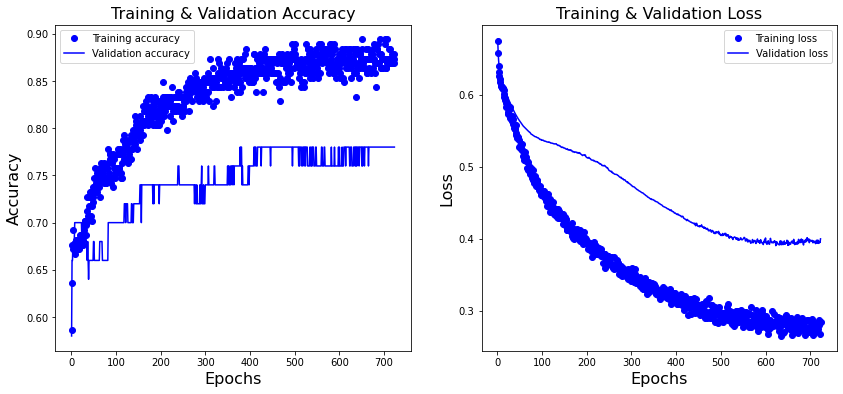

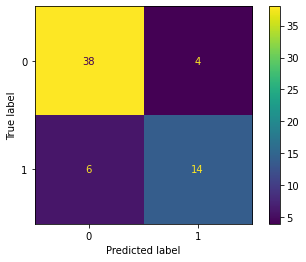

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
O dropout atual é: 0.2
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 10)                130       
                                                                 
 dropout_58 (Dropout)        (None, 10)                0         
                                                                 
 dense_101 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 11ms/step - loss: 0.3264 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.82      0.70      0.76        

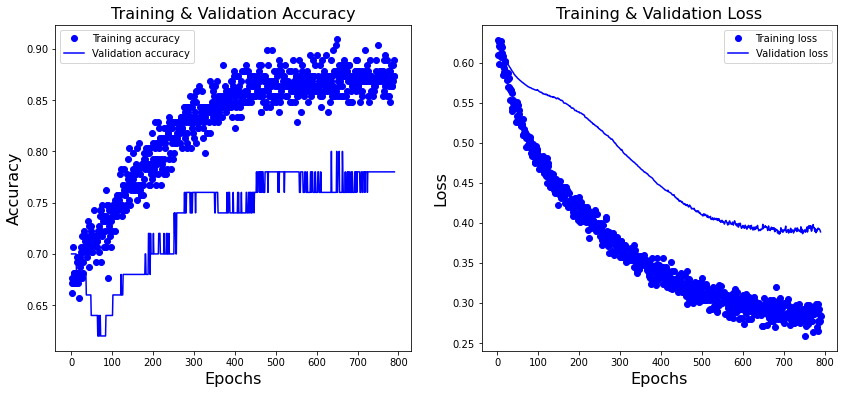

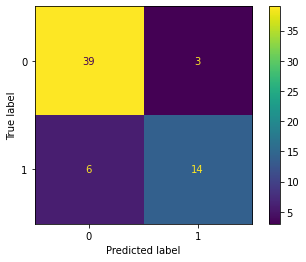

Accuracy
Label 0: 92.86 %
Label 1: 70.00 %
O dropout atual é: 0.30000000000000004
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                130       
                                                                 
 dropout_59 (Dropout)        (None, 10)                0         
                                                                 
 dense_103 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.3331 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.82      0.70   

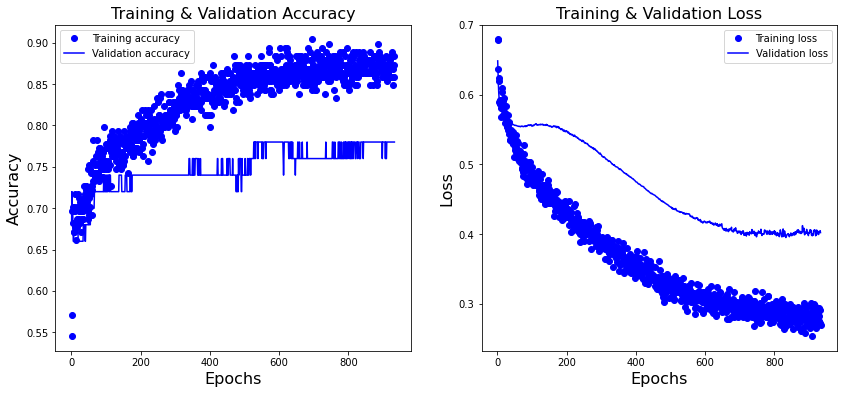

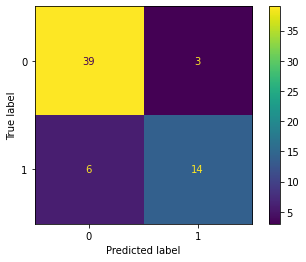

Accuracy
Label 0: 92.86 %
Label 1: 70.00 %
O dropout atual é: 0.4
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 10)                130       
                                                                 
 dropout_60 (Dropout)        (None, 10)                0         
                                                                 
 dense_105 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 10ms/step - loss: 0.3222 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.79      0.75      0.77        

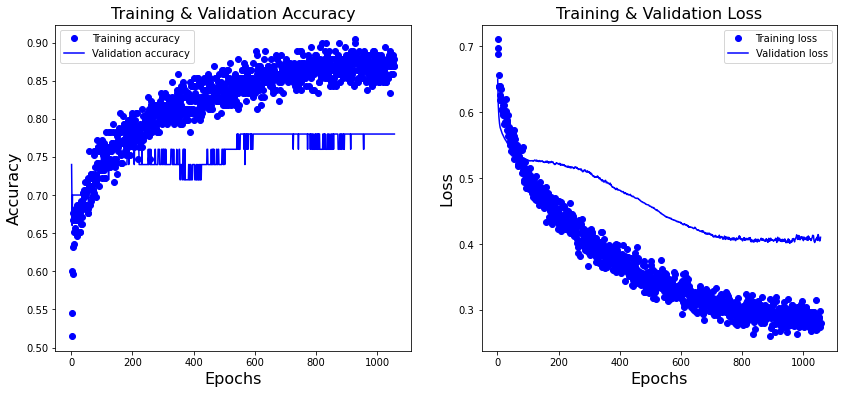

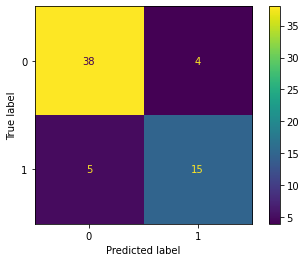

Accuracy
Label 0: 90.48 %
Label 1: 75.00 %
O dropout atual é: 0.5
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 10)                130       
                                                                 
 dropout_61 (Dropout)        (None, 10)                0         
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 11ms/step - loss: 0.3335 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70      0.74        

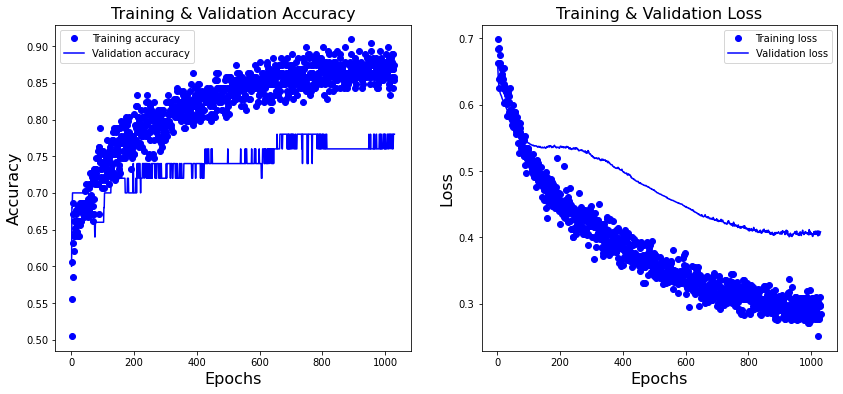

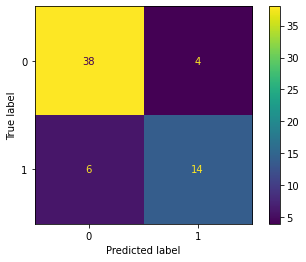

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
O dropout atual é: 0.6000000000000001
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 10)                130       
                                                                 
 dropout_62 (Dropout)        (None, 10)                0         
                                                                 
 dense_109 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.3487 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70    

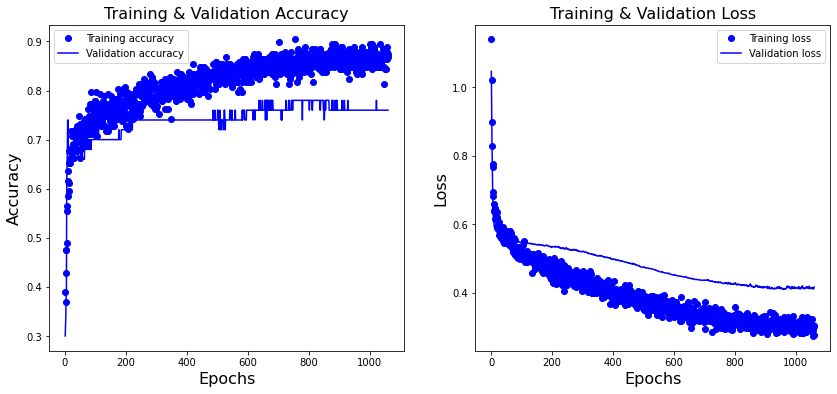

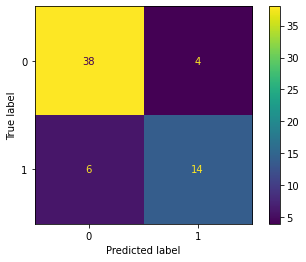

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %
O dropout atual é: 0.7000000000000001
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 10)                130       
                                                                 
 dropout_63 (Dropout)        (None, 10)                0         
                                                                 
 dense_111 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.3224 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.78      0.70    

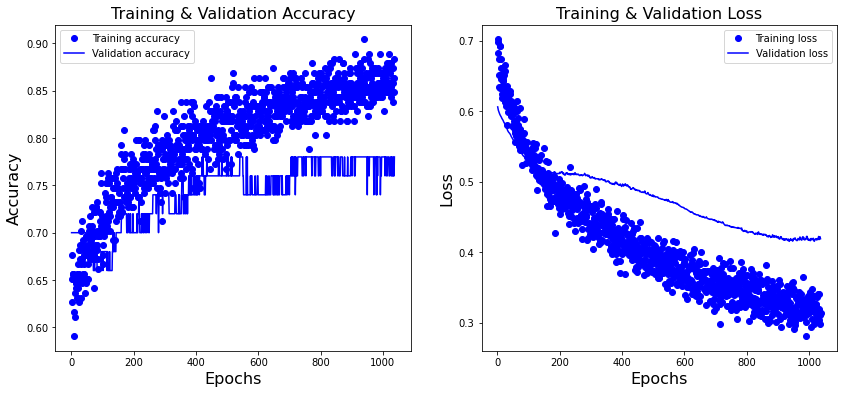

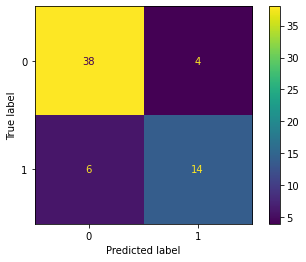

Accuracy
Label 0: 90.48 %
Label 1: 70.00 %


In [ ]:
eval = []
values = np.arange(0, 0.8, 0.1)
for i in values:
  model = create_model(units, activation, do=i)
  print('O dropout atual é: ' + str(i))
  history = train_model(model, opt, lr, X_train, y_train)
  eval.append(model.evaluate(X_test, y_test))
  historyPlot(model, history.history, X_test, y_test)

#### Resultados

In [ ]:
for i in range(len(eval)):
  print(("Dropout " + str(values[i]) + " | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(percentage2=eval[i][0], percentage1=100*(eval[i][1])))

Dropout 0.0 | Accuracy: 82.26 % | Loss: 0.32
Dropout 0.1 | Accuracy: 83.87 % | Loss: 0.33
Dropout 0.2 | Accuracy: 85.48 % | Loss: 0.33
Dropout 0.30000000000000004 | Accuracy: 85.48 % | Loss: 0.33
Dropout 0.4 | Accuracy: 85.48 % | Loss: 0.32
Dropout 0.5 | Accuracy: 83.87 % | Loss: 0.33
Dropout 0.6000000000000001 | Accuracy: 83.87 % | Loss: 0.35
Dropout 0.7000000000000001 | Accuracy: 83.87 % | Loss: 0.32


Os experimentos mostram que a adição do dropout não trouxe melhoras significativas na acurácia ou no loss mas o dropout de 40% trouxe os melhores resultados com F1 score macro de 83%.

In [ ]:
do = 0.4

#### Modelo Balanceado

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 10)                130       
                                                                 
 dropout_65 (Dropout)        (None, 10)                0         
                                                                 
 dense_115 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84    

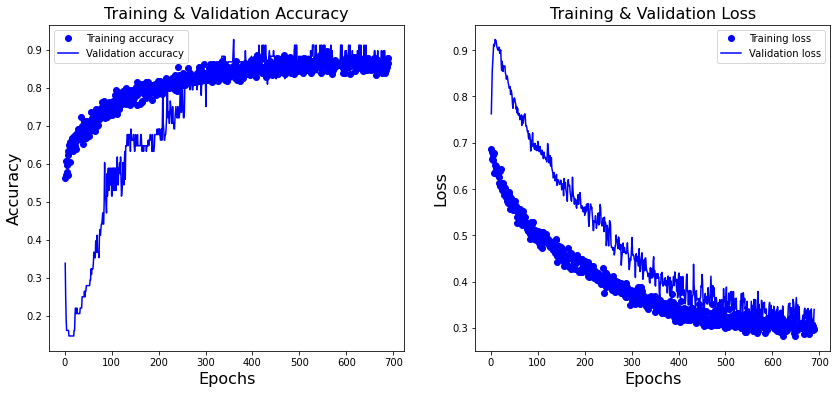

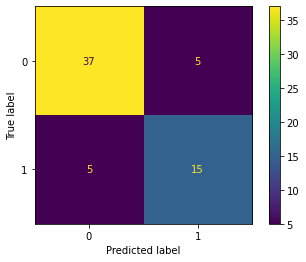

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
modelOS = create_model(units, activation, do = do)
HistoryOS = train_model(modelOS, opt, lr, X_train1, y_train1)
historyPlot(modelOS, HistoryOS.history, X_test, y_test)

Observa-se que o modelo balanceado não teve melhoria significativa com a adição do dropout de 40% mantendo um F1 score macro de 82%.

### Análise Final MLP

Agora que todos os experimentos foram realizados, iremos reunir os melhores valores dos parâmetros em um único modelo e observar sua performance. Os melhores parâmetros foram:

*     Algoritmo de aprendizagem: RMSprop
*     Taxa de aprendizagem: 0.0005
*     Tamanho da rede: 1 camada densa com 10 unidades
*     Função de ativação: tanh
*     Dropout: 40%

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                130       
                                                                 
 dropout_66 (Dropout)        (None, 10)                0         
                                                                 
 dense_117 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 0.3332 - binary_accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.82      0.70      0.76        20

    accuracy                           0.85        62
   macro 

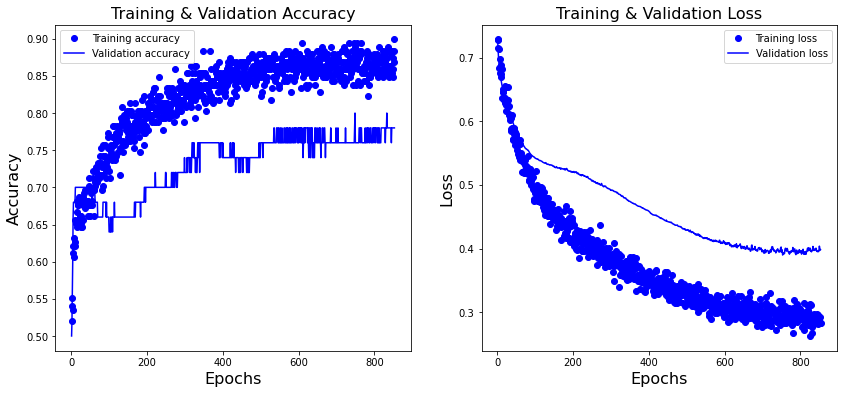

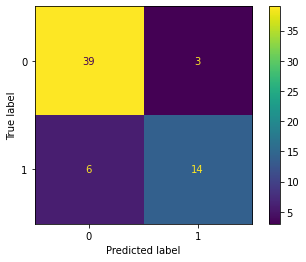

Accuracy
Label 0: 92.86 %
Label 1: 70.00 %


In [ ]:
best_model_MLP = create_model(units, activation, unitsV, do)
best_history = train_model(best_model_MLP, opt, lr, X_train, y_train)
best_eval_MLP = best_model_MLP.evaluate(X_test, y_test)
historyPlot(best_model_MLP, best_history.history, X_test, y_test)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 10)                130       
                                                                 
 dropout_69 (Dropout)        (None, 10)                0         
                                                                 
 dense_123 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 10ms/step - loss: 0.3213 - binary_accuracy: 0.8387
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro

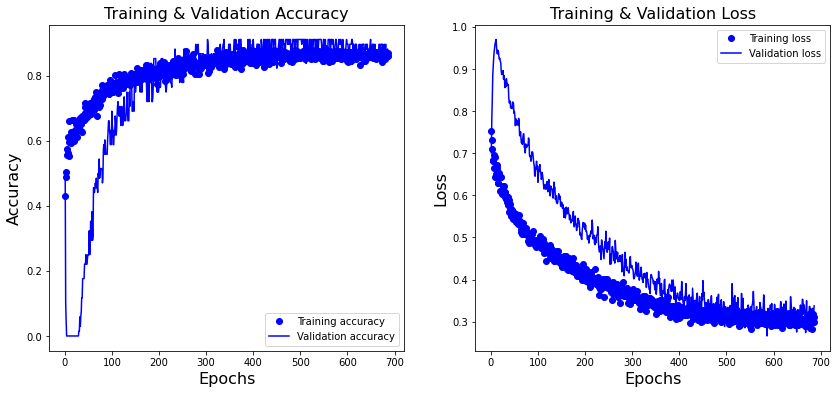

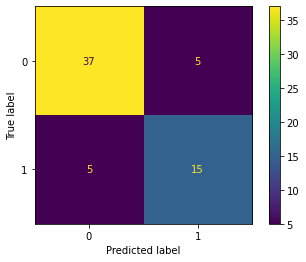

Accuracy
Label 0: 88.10 %
Label 1: 75.00 %


In [ ]:
best_model_MLP_OS = create_model(units, activation, unitsV, do)
best_history_OS = train_model(best_model_MLP_OS, opt, lr, X_train1, y_train1)
best_eval_MLP_OS = best_model_MLP_OS.evaluate(X_test, y_test)
historyPlot(best_model_MLP_OS, best_history_OS.history, X_test, y_test)

In [ ]:
print(("Best Model | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(percentage2=best_eval_MLP[0], percentage1=100*(best_eval_MLP[1])))
print(("Best Model OS | Accuracy: {percentage1:.2f} % | Loss: {percentage2:.2f}").format(percentage2=best_eval_MLP_OS[0], percentage1=100*(best_eval_MLP_OS[1])))

Best Model | Accuracy: 85.48 % | Loss: 0.33
Best Model OS | Accuracy: 83.87 % | Loss: 0.32


Com os melhores parâmetros obtidos, ambos modelos tiveram alta acurácia e baixa loss mas o modelo balanceado teve maior acurácia para os casos normais por conta das novas entradas criadas pelo SMOTE.

Além disso, em todos os treinamentos do modelo balanceado é possível notar a necessidade de um valor de patience alto pois nas primeiras epochs sua acurácia diminui e seu loss cresce.